In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Visualizing Data

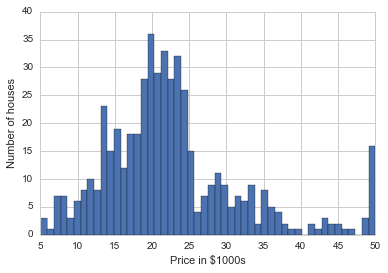

In [5]:
# Histogram of prices 
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

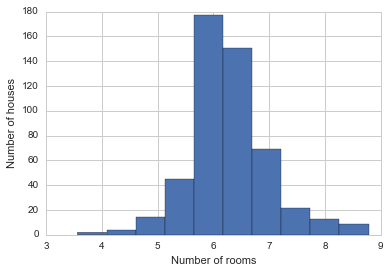

In [6]:
# Histogram of Number of Rooms 
plt.hist(boston.data[:,5],bins=10)

#label
plt.ylabel('Number of houses')
plt.xlabel('Number of rooms')

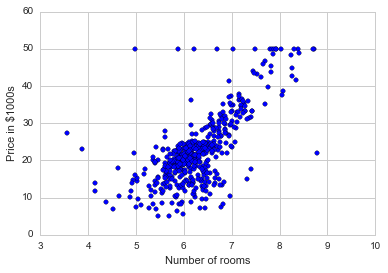

In [7]:
# Scatter Plot of house price based on Number of Rooms
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

### From the above scatter plot we find there is positive correlation between number of rooms and house price. If house rooms increase, house price also increase.

In [10]:
#Creating DataFrame for boston data
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We will use this for finding univarite linear regression from boston dataset. We want to find out the relation between Number of Rooms and Price. So here our input variable is Number of Rooms.

In [9]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

# Set up Y as the target price of the houses.
Y = boston_df.Price

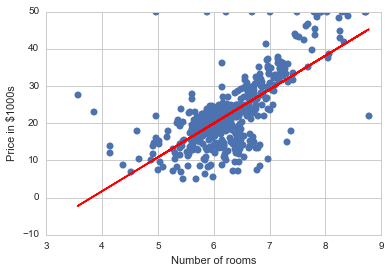

In [12]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

### Here the red line is the linear regression line for our data. Now we can predict house price based on given number of rooms of a house.

# Multivariate Linear Regression

We will use  linear regression library from the sklearn module for this purpose. Here our variables or features are all the columns data. We want to predict house price based on these data.

In [14]:
import sklearn
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

lreg.fit(X_multi,Y_target)

print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13 


In [25]:
# Printing coefficient of each variables or features
coeff_df = DataFrame(boston_df.columns)
coeff_df = coeff_df.drop(13)
coeff_df.columns = ['Features']
#coeff_df = coeff_df[coeff_df.Features != 'Price']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


## Cross Validation

Now we will split the boston data into training and testing sets using scikit learn's  train_test_split method. Then we will use training data to build our linear regression model and will use testing data to check the validity of our model.

In [26]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

lreg = LinearRegression()
lreg.fit(X_train, Y_train)

# Predictions on testing sets
pred_test = lreg.predict(X_test)

print("Mean Square Error for the testing data: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Mean Square Error for the testing data: 53.92
